<ipython-input-1-00c0d8f9c4a8>:22: RuntimeWarning: divide by zero encountered in true_divide
  H3 = 1 / (1 +(cutoff[1]/D)**2)
<ipython-input-1-00c0d8f9c4a8>:28: RuntimeWarning: divide by zero encountered in true_divide
  H4 = 1 / (1 + (cutoff[1]/D) ** 4)
<ipython-input-1-00c0d8f9c4a8>:34: RuntimeWarning: divide by zero encountered in true_divide
  H5 = 1 / (1 + (cutoff[3]/D) ** 2)
<ipython-input-1-00c0d8f9c4a8>:40: RuntimeWarning: divide by zero encountered in true_divide
  H6 = 1 / (1 + (cutoff[3]/D) ** 4)


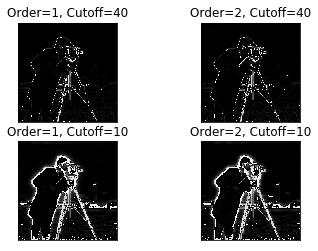

In [1]:
import cv2  
import numpy as np  
from matplotlib import pyplot as plt
img = cv2.imread('camera.png',0)
min = np.minimum(img.shape[0], img.shape[1])
img = cv2.resize(img, (min, min))
img[img >= 225] = 0
M, N = img.shape
# computing the 2-d fourier transformation of the image
fourier_image = np.fft.fft2(img)
u = np.array(range(0, M))
v = np.array(range(0, N))
idx = np.where(u > (M / 2))
u[idx] = u[idx] - M
idy = np.where(v > N / 2)
v[idy] = v[idy] - N
[V, U] = np.meshgrid(v, u)
D = (U ** 2 + V ** 2) ** (1 / 2)
# cutoff = 40
cutoff = [50, 40, 20, 10]
#order = [1,2]
H3 = 1 / (1 +(cutoff[1]/D)**2)
G3 = H3 * fourier_image
imback2 = np.fft.ifft2(G3)
imback2 = np.uint8(np.real(imback2))
imback2[imback2 >= 225] = 0

H4 = 1 / (1 + (cutoff[1]/D) ** 4)
G4 = H4 * fourier_image
imback3 = np.fft.ifft2(G4)
imback3 = np.uint8(np.real(imback3))
imback3[imback3 >= 225] = 0

H5 = 1 / (1 + (cutoff[3]/D) ** 2)
G5 = H5 * fourier_image
imback4 = np.fft.ifft2(G5)
imback4 = np.uint8(np.real(imback4))
imback4[imback4 >= 225] = 0

H6 = 1 / (1 + (cutoff[3]/D) ** 4)
G6 = H6 * fourier_image
imback5 = np.fft.ifft2(G6)
imback5 = np.uint8(np.real(imback5))
imback5[imback5 >= 225] = 0


plt.subplot(221), plt.imshow(imback2, cmap='gray')
plt.title('Order=1, Cutoff=40'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(imback3, cmap='gray')
plt.title('Order=2, Cutoff=40'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(imback4, cmap='gray')
plt.title('Order=1, Cutoff=10'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(imback5, cmap='gray')
plt.title('Order=2, Cutoff=10'), plt.xticks([]), plt.yticks([])
plt.show()
